# Regression

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent and independent variable.
or 
A process by which we estimate the value of dependent variable on the basis of one or more independent variable.

1. Linear Resgression
2. Logistic Regression

# Linear Regression
Linear Regression is the most basic algorithm in Machine Learning. It is a regression algorithm which means that it is useful when we are required to predict continuous values, that is, the output variable  ‘y’ is continuous in nature.

1. The method of least squares calculates square of deviation of points from the line chosen using Linear Regression.
2. All data points falling along a straight line is called Linear relationship.
3. Two unknown constants are their in simple linear regression.
4. If the value of any regression coeficient is zero, then two variables are independent.

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [22]:
# read the data
data = pd.read_csv("data_for_lr.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [23]:
data.shape

(700, 2)

In [24]:
data.columns

Index(['x', 'y'], dtype='object')

In [25]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


In [27]:
print(data.corr())

         x        y
x  1.00000  0.99534
y  0.99534  1.00000


#### Handling NULL Value

In [28]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


#### Splitting data

In [30]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]
print(x.head())
print(y.tail())
print(x.shape,y.shape)

      x
0  24.0
1  50.0
2  15.0
3  38.0
4  87.0
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, dtype: float64
(699, 1) (699,)


In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 1)
(140, 1)
(559,)
(140,)


In [32]:
from sklearn.linear_model import LinearRegression
std_model  = LinearRegression()
std_model.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = std_model.predict(x_test)
print(y_pred)
print(y_test)
print(x_test)

[ 9.76103801e+01  7.76854962e+01  8.66516939e+01  6.27418333e+01
  7.37005194e+01  4.68019262e+01  2.58807981e+01  6.07493449e+01
  6.67268101e+01  1.99033330e+01  9.96028684e+01  1.29296236e+01
  9.86066242e+01  5.37756355e+01  8.86441823e+01  4.97906588e+01
  7.07117868e+01  4.48094378e+01  2.38883097e+01  9.26291591e+01
  7.27042752e+01  4.97906588e+01  8.16704730e+01  9.26291591e+01
  3.18582633e+01  9.94089102e+00  9.94089102e+00  1.39258678e+01
  3.08620191e+01  5.07869030e+01  2.48845539e+01  1.69146004e+01
  3.48469959e+01  1.59183562e+01  7.46967636e+01  3.08620191e+01
  8.56554497e+01  6.17455891e+01  6.77230542e+01  3.08620191e+01
  4.18207052e+01  6.77230542e+01  6.95215844e+00  4.28169494e+01
  9.46216475e+01  5.57681239e+01  2.38883097e+01  2.58807981e+01
  5.27793913e+01  6.97155426e+01  2.98657749e+01  9.06366707e+01
  5.77606123e+01  1.59183562e+01  7.27042752e+01  4.77981704e+01
  3.78357284e+01  5.07869030e+01  3.18582633e+01  6.87192984e+01
  2.96718167e+00  6.95215

In [34]:
print(std_model.coef_)
print(std_model.intercept_)
from sklearn.metrics import r2_score, mean_squared_error
print("accuracy is: ", r2_score(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

[0.99624419]
-0.021550913367399005
accuracy is:  0.9887032554723144
Mean Squared Error:  9.299074911884453


In [35]:
vif = 1/1-(r2_score(y_test,y_pred))

vif

0.011296744527685587

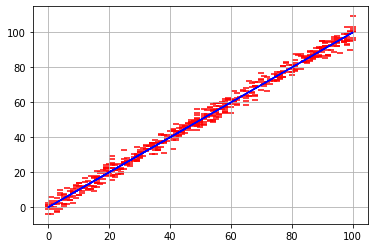

In [43]:
plt.scatter(x_train,y_train, marker= '_',color='r')
plt.plot(x_train,std_model.predict(x_train),color='b')         
plt.grid()
plt.show()

In [38]:
np.random.uniform(0,1)

0.8065209007761913

# Applications of linear regression
1.“What is the market value of the house?”

2.“Stock price prediction”

3.“Sales of a shop”

4.“Predicting height of a person”

# Use case of Linear Regression

 1. Determining the strength of predictors
 2. Forecasting and effect
 3. Trend Forecasting